In [2]:
pip install pyspark==3.2.3

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("capstone") \
      .getOrCreate() 


In [4]:
df = spark.read.csv("Capstone market analysis (4).csv",header = True)

In [5]:
df.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may

In [6]:
df.createTempView("bank")

In [7]:


df9 = spark.sql("select (subscribed/total)*100 as marketing_success_rate from (select count(*) as subscribed from bank where y = 'yes') , (select count (*) as total from bank)").show()

df10 = spark.sql("select (not_subscribed/total)*100 as marketing_failure_rate from (select count(*) as not_subscribed from bank where y = 'no') , (select count (*) as total from bank)").show()

+----------------------+
|marketing_success_rate|
+----------------------+
|    11.698480458295547|
+----------------------+

+----------------------+
|marketing_failure_rate|
+----------------------+
|     88.30151954170445|
+----------------------+



In [8]:
df1 = spark.sql("select max(age) from bank")
df1.show()
df2 = spark.sql("select min(age) from bank")
df2.show()
df3 = spark.sql("select avg(age) from bank")
df3.show()

+--------+
|max(age)|
+--------+
|      95|
+--------+

+--------+
|min(age)|
+--------+
|      18|
+--------+

+-----------------+
|         avg(age)|
+-----------------+
|40.93621021432837|
+-----------------+



In [9]:
df4=spark.sql("select avg(balance) from bank")
df4.show()

+------------------+
|      avg(balance)|
+------------------+
|1362.2720576850766|
+------------------+



In [10]:
df5 = spark.sql("select percentile_approx(balance, 0.5) as median from bank")
df5.show()

+------+
|median|
+------+
| 448.0|
+------+



In [11]:
df6 = spark.sql("select age, count(*) as number from bank where y='yes' group by age")
df6.show()


+---+------+
|age|number|
+---+------+
| 51|    77|
| 54|    84|
| 29|   171|
| 69|    17|
| 42|   111|
| 73|    24|
| 87|     3|
| 64|    35|
| 30|   217|
| 34|   198|
| 59|    88|
| 28|   162|
| 22|    40|
| 85|     4|
| 35|   209|
| 52|    85|
| 71|    25|
| 47|   113|
| 43|   103|
| 31|   206|
+---+------+
only showing top 20 rows



In [12]:
df7 = spark.sql("select marital, count(*) as number from bank where y='yes' group by marital ")
df7.show()

+--------+------+
| marital|number|
+--------+------+
|divorced|   622|
| married|  2755|
|  single|  1912|
+--------+------+



In [13]:
df8= spark.sql("select age,marital, count(*) as number from bank where y='yes' group by age,marital").show()

+---+--------+------+
|age| marital|number|
+---+--------+------+
| 73|divorced|     4|
| 59|divorced|    16|
| 21|  single|    21|
| 53|divorced|    18|
| 69|divorced|     3|
| 18|  single|     7|
| 29| married|    33|
| 67|  single|     1|
| 27|divorced|     2|
| 46|divorced|    25|
| 58| married|    54|
| 80| married|    11|
| 54|divorced|    24|
| 66| married|    22|
| 68|  single|     2|
| 56| married|    49|
| 70| married|    12|
| 31| married|    80|
| 33|  single|    97|
| 84| married|     4|
+---+--------+------+
only showing top 20 rows



In [32]:
from pyspark.sql.functions import when
from pyspark.sql.functions import lit

newdf = df.withColumn("agedf", \
   when((df.age < 20), lit("Teen")) \
     .when((df.age > 20) & (df.age <= 32), lit("Young")) \
     .when((df.age > 33) & (df.age <= 55), lit("Middle Aged")) \
     .otherwise(lit("Old")) \
  )


In [33]:
newdf.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+-----------+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|      agedf|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+-----------+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|        Old|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|Middle Aged|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|        Old|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|Middle Aged|

In [35]:
newdf.createTempView("newbank")

In [49]:
age_target_yes = spark.sql("select agedf as age_target_yes, count(*) as yes_number from newbank where y='yes' group by agedf order by yes_number desc ")
age_target_yes.show()
age_target_no = spark.sql("select agedf as age_target_no, count(*) as no_number from newbank where y='no' group by agedf order by no_number desc ")
age_target_no.show()

+--------------+----------+
|age_target_yes|yes_number|
+--------------+----------+
|   Middle Aged|      2601|
|         Young|      1539|
|           Old|      1131|
|          Teen|        18|
+--------------+----------+

+-------------+---------+
|age_target_no|no_number|
+-------------+---------+
|  Middle Aged|    24627|
|        Young|     9475|
|          Old|     5791|
|         Teen|       29|
+-------------+---------+



In [50]:
age_target_yes.createTempView("age_yes")


In [51]:
age_target_no.createTempView("age_no")

In [53]:
visualdf = spark.sql("select a.*,b.no_number from age_yes a join age_no b on a.age_target_yes = b.age_target_no")
visualdf.show()

+--------------+----------+---------+
|age_target_yes|yes_number|no_number|
+--------------+----------+---------+
|   Middle Aged|      2601|    24627|
|          Teen|        18|       29|
|           Old|      1131|     5791|
|         Young|      1539|     9475|
+--------------+----------+---------+



In [57]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

TypeError: object of type 'Column' has no len()

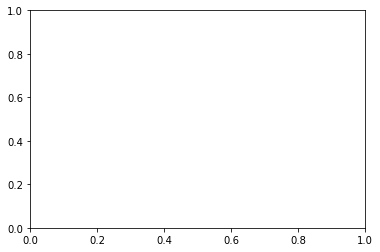

In [64]:
x=visualdf["age_target_yes"]
y=visualdf["yes_number", "no_number"]
plt.plot(x, y, kind="bar", figsize=(9, 8))
 
plt.show()